In [54]:
# libs
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [55]:
# load data
data = pandas.read_csv("weather_forecast_data.csv")
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2475.000000,2460.000000,2468.000000,2467.000000,2473.000000
mean,22.573777,64.366909,9.911826,49.808770,1014.409327
std,7.332397,19.973824,5.780705,29.062298,20.182257
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.356603,47.183183,4.782528,24.261914,997.029601
50%,22.533110,64.090914,9.908572,49.692078,1013.583677
75%,28.984159,81.561021,14.953142,75.417253,1031.762839
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [56]:
data.isnull().sum()

Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64

In [57]:
# drop nulls of the data set
DF_DropNulls = data.copy()
DF_DropNulls.dropna(inplace=True)

In [58]:
# get numeric features only
numericFeatures = data.select_dtypes(include="number")

In [59]:
# loop on all cols, to replace all nulls of it with the mean of the col
numericFeaturesWithMean = numericFeatures.copy()
for column in numericFeatures.columns:
    featureMean = numericFeaturesWithMean[column].mean()
    numericFeaturesWithMean[column].fillna(featureMean, inplace=True)

C:\Users\lap top eur\AppData\Local\Temp\ipykernel_18592\3040548849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numericFeaturesWithMean[column].fillna(featureMean, inplace=True)


feature scaling <br>
spliting data

In [60]:
from sklearn.preprocessing import StandardScaler

# scalling data 
scaler = StandardScaler()

# scaling data with mean 
for column in numericFeaturesWithMean.columns:
     numericFeaturesWithMean[column] = scaler.fit_transform( numericFeaturesWithMean[[column]])

# scaling data without nulls
for column in DF_DropNulls.select_dtypes(include="number").columns:
   DF_DropNulls[column] = scaler.fit_transform( DF_DropNulls[[column]])


In [61]:
# spliting training data and testing data
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()

targetFeatureFor_DF_WithMean = label_encoder.fit_transform(data['Rain'])
targetFeatureFor_DF_WithoutNulls = label_encoder.fit_transform(DF_DropNulls['Rain'])
DF_WithoutNuls_numericFeatrues = DF_DropNulls.select_dtypes(include="number") 

x_withMean_train, x_withMean_test, y_withMean_train, y_withMean_test = train_test_split(numericFeaturesWithMean, targetFeatureFor_DF_WithMean, test_size=0.2, random_state=42)
x_withoutNulls_train, x_withoutNulls_test, y_withoutNulls_train, y_withoutNulls_test = train_test_split(DF_WithoutNuls_numericFeatrues, targetFeatureFor_DF_WithoutNulls, test_size=0.2, random_state=42)


print(y_withoutNulls_train[:10])

 
 

[0 0 0 0 0 0 0 0 0 0]


In [62]:
knn_with_mean = KNeighborsClassifier(n_neighbors=5)
knn_with_mean.fit(x_withMean_train, y_withMean_train)
y_pred_with_mean = knn_with_mean.predict(x_withMean_test)


In [63]:
print("Accuracy::", accuracy_score(y_withMean_test, y_pred_with_mean))
print("precision:",precision_score(y_withMean_test, y_pred_with_mean))
print("recall:",recall_score(y_withMean_test, y_pred_with_mean))

Accuracy:: 0.968
precision: 0.9166666666666666
recall: 0.7857142857142857


In [64]:
knn_without_nulls = KNeighborsClassifier(n_neighbors=5)
knn_without_nulls.fit(x_withoutNulls_train, y_withoutNulls_train)
y_pred_without_nulls = knn_without_nulls.predict(x_withoutNulls_test)

In [65]:
print("Accuracy:", accuracy_score(y_withoutNulls_test, y_pred_without_nulls))
print("precision:",precision_score(y_withoutNulls_test, y_pred_without_nulls))
print("recall:",recall_score (y_withoutNulls_test, y_pred_without_nulls))

Accuracy: 0.9617021276595744
precision: 0.890625
recall: 0.8382352941176471


In [66]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        predictions = []
        for x_test in X_test.values: 
            distances = []
            for x_train in self.X_train.values:  
                distances.append(self.euclidean_distance(x_test, x_train))
            nearest_neighbors = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_neighbors]
            prediction = np.argmax(np.bincount(nearest_labels))
            predictions.append(prediction)
        return np.array(predictions)


In [67]:
knn = KNN(k=3)

knn.fit(x_withMean_train, y_withMean_train)

# Predict the labels for the test set
predictions = knn.predict(x_withMean_test)

euclidean_accuracy = accuracy_score(y_withMean_test,predictions)
print(euclidean_accuracy)

0.97


Decision Tree

create train and test for data with mean

In [68]:
decisionTreeClassifierWithMean = tree.DecisionTreeClassifier()
decisionTreeClassifierWithMean.fit(x_withMean_train, y_withMean_train)
y_withMean_predicted = decisionTreeClassifierWithMean.predict(x_withMean_test)

In [69]:
print(f"Accuracy: {accuracy_score(y_withMean_test, y_withMean_predicted) * 100}%")
print(f"precision: {precision_score(y_withMean_test, y_withMean_predicted) * 100}%")
print(f"recall: {recall_score (y_withMean_test, y_withMean_predicted) * 100}%")

Accuracy: 99.6%
precision: 98.21428571428571%
recall: 98.21428571428571%


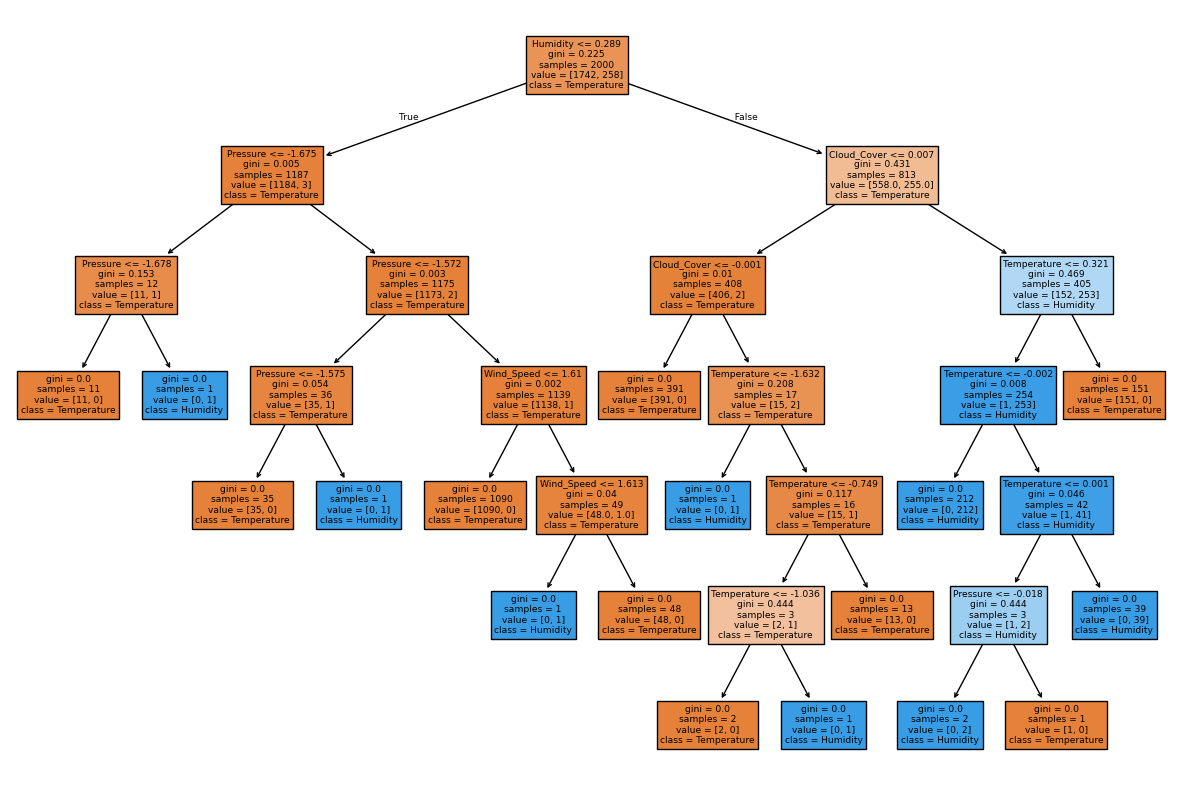

In [70]:
# visulize decision tree for sample with mean
plt.figure(figsize=(15, 10))
tree.plot_tree(decisionTreeClassifierWithMean, filled=True, feature_names=x_withMean_train.columns, class_names=["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"])
plt.show()

create train and test for data without nulls

In [71]:
decisionTreeClassifierWithNulls = tree.DecisionTreeClassifier()
decisionTreeClassifierWithNulls.fit(x_withoutNulls_train, y_withoutNulls_train)
y_withoutNulls_predicted = decisionTreeClassifierWithNulls.predict(x_withoutNulls_test)

In [72]:
print(f"Accuracy: {accuracy_score(y_withoutNulls_test, y_withoutNulls_predicted) * 100}%")
print(f"precision: {precision_score(y_withoutNulls_test, y_withoutNulls_predicted) * 100}%")
print(f"recall: {recall_score (y_withoutNulls_test, y_withoutNulls_predicted) * 100}%")

Accuracy: 99.7872340425532%
precision: 100.0%
recall: 98.52941176470588%


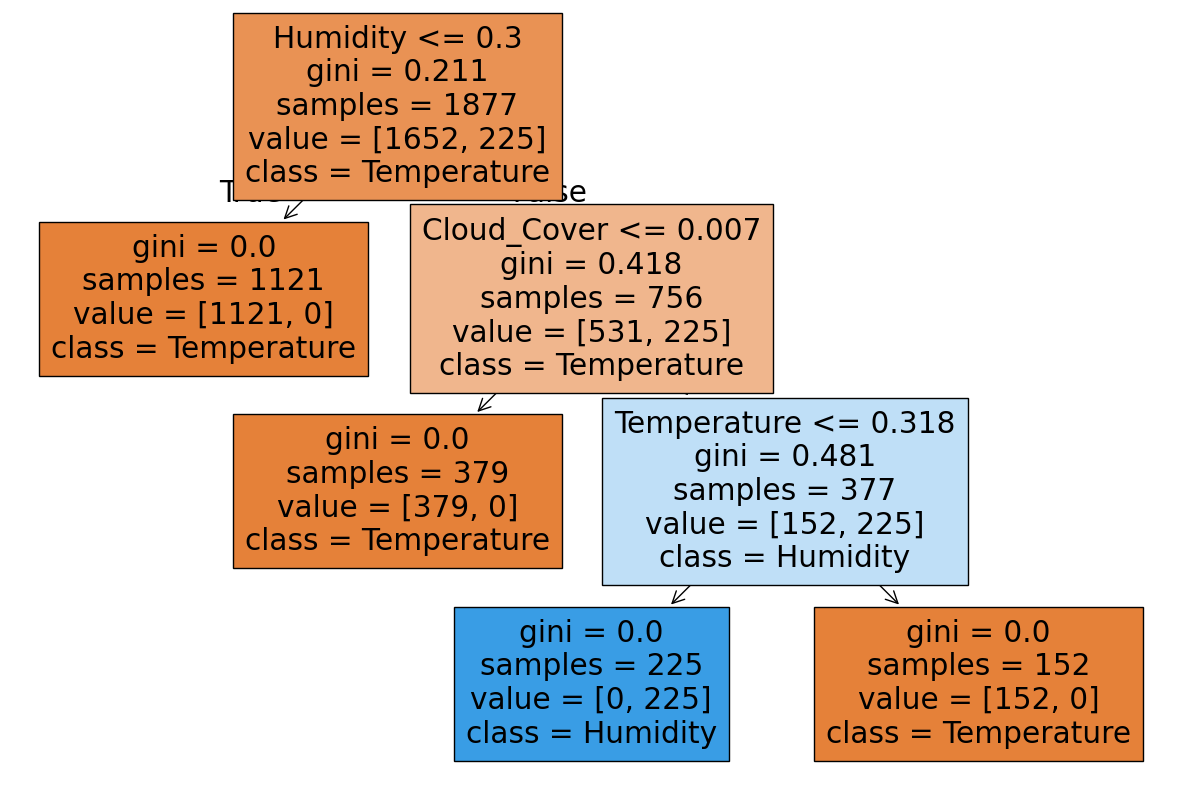

In [73]:
# visulize decision tree for sample with mean
plt.figure(figsize=(15, 10))
tree.plot_tree(decisionTreeClassifierWithNulls, filled=True, feature_names=x_withoutNulls_train.columns, class_names=["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"])
plt.show()